<a href="https://colab.research.google.com/github/chaotiqc/ml_studies/blob/main/crossentropy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Para a criação deste código, foi utilizado as seguintes fontes:



Criação/revisão de gradiente estocastico:
- https://pt.d2l.ai/chapter_optimization/sgd.html
- https://scikit-learn.org/stable/modules/sgd.html

Documentação de algumas bibliotecas/funções:
- https://numpy.org/devdocs/user/index.html
- https://www.w3schools.com/python/ref_random_shuffle.asp


Para ler com mais calma:
- https://sites.icmc.usp.br/andre/research/hybrid/edna.htm
- https://www.quora.com/What-does-it-mean-that-a-neural-network-is-invariant-to-permutation-When-does-this-happen
- https://sites.icmc.usp.br/andre/research/neural/index.htm
- https://arxiv.org/pdf/1302.4389
- https://www.cs.columbia.edu/~jebara/papers/pannagajebara.pdf
- https://repositorio.ufu.br/bitstream/123456789/34044/4/AbordagensEvolutivasOtimiza%C3%A7%C3%A3o.pdf

## Primeiro passo:

Nesta seção foi realizado:
1. Importação de bibliotecas;
2. Leitura da base de dados;
3. Criação de bias e dos pesos;
4. Definição de hiperparâmetros
5. Criação de funções referentes à sigmoide e à cross entropy.

In [27]:
# importando as bibliotecas necessárias
## para a criação dos gráficos:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
## para análise dos dados e afins:
import numpy as np
import pandas as pd

In [28]:
## lendo a base de dados

data = pd.read_excel('/content/drive/MyDrive/Física - Bacharel Lic./deep learning & colisões de partículas/Base_N1_B1_2024.1.xlsx')
data.head()

,Feature1,Feature2,Label
0,0.000,5.472986,Red
1,0.005,4.326074,Red
2,0.010,5.257439,Red
3,0.015,3.321764,Red
4,0.020,5.783143,Red


In [29]:
x = data[["Feature1","Feature2"]].values

### definindo o viés

xb = np.c_[np.ones(x.shape[0]), x]

### definindo os pesos
np.random.seed(42)
w = np.random.rand(xb.shape[1], 1)

mapa = {"Red": 0, "Blue": 1}
y = np.array([mapa[label] for label in data["Label"]]).reshape(-1,1).astype(float)

In [30]:
## definindo os hiperparâmetros
alpha = 0.01 ## taxa de aprendizado
epocas = 100 ## numero de vezes em que o dado todo passa pela rede neural
erros = []

In [31]:
# criando a funcao sigmoid
def sigmoid(z):
    return 1/(1 + np.exp(-z))

## criando a funcao da perda de entropia cruzada
def entropia_cruzada(y, y1):
    e = 1e-10
    y1 = np.clip(y1, e, 1-e)
    return -np.mean(y * np.log(y1) + (1-y)*np.log(1-y1))

## Segundo passo:

Nesta sessão foi feito:
1. o treinamento das epocas
2. a atualização dos pesos
3. o armazenamento das perdas na lista "erros[]"

In [32]:
## treinamento
print("Iniciando o treinamento...")
for epoca in range(epocas):
    # logit
    z = xb @ w # w*x+b #### o @ é uma função do numpy de multiplicacao de matrizes
    y1 = sigmoid(z)
   ## perda
    loss = entropia_cruzada(y, y1)
    erros.append(loss)

    ## gradiente

    dw = (1 / y.shape[0]) * (xb.T @ (y1 - y))

    # atualização dos pesos
    w -= alpha * dw

print("Treinamento concluído!")

print(f"Os pesos finais são:{w}")


Iniciando o treinamento...
Treinamento concluído!
Os pesos finais são:[[ 0.29599422]
 [ 0.86936094]
 [-0.51498314]]


## Gráficos



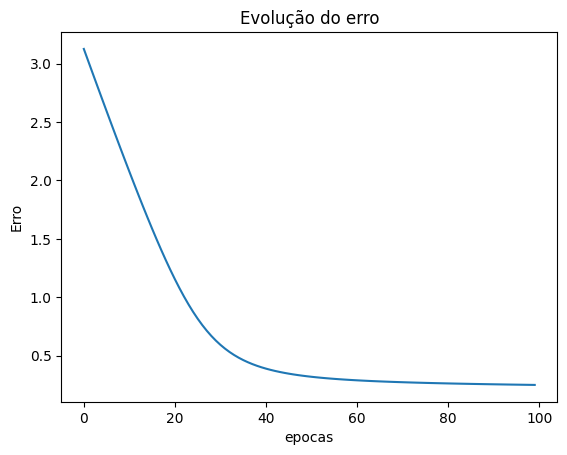

In [33]:
## grafico da evolução dos erros em relação às epocas
plt.plot(erros)
plt.xlabel("epocas")
plt.ylabel("Erro")
plt.title("Evolução do erro")
plt.show()

Text(0.5, 1.0, 'Classificação Linear')

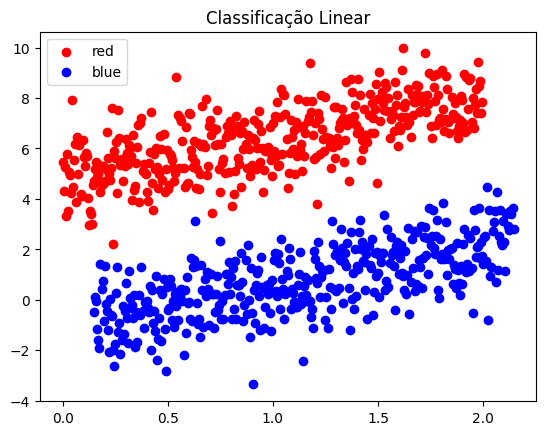

In [34]:
plt.scatter(x[y[:,0]==0,0], x[y[:,0]==0,1], c="red", label="red") ## todos os valores da feature2 onde a classe é 0
plt.scatter(x[y[:,0]==1,0], x[y[:,0]==1,1], c="blue", label="blue") ## todos os valores da feature1 onde a classe é 1
plt.legend()
plt.title("Classificação Linear")

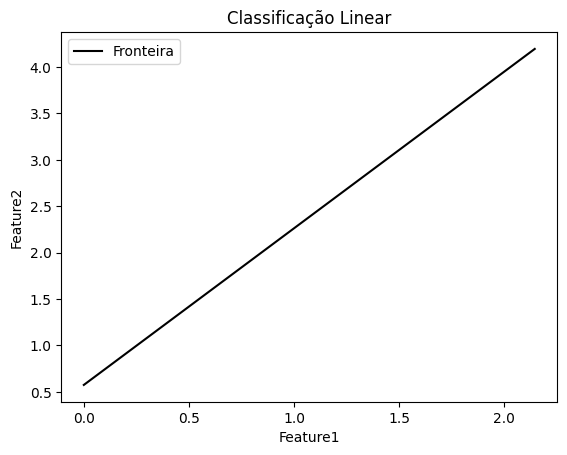

In [35]:
x1_vals = np.linspace(x[:,0].min(), x[:,0].max(), 100)
x2_vals = -(w[0] + w[1]*x1_vals) / w[2]
plt.plot(x1_vals, x2_vals, "k-", label="Fronteira")
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.legend()
plt.title("Classificação Linear")
plt.show()

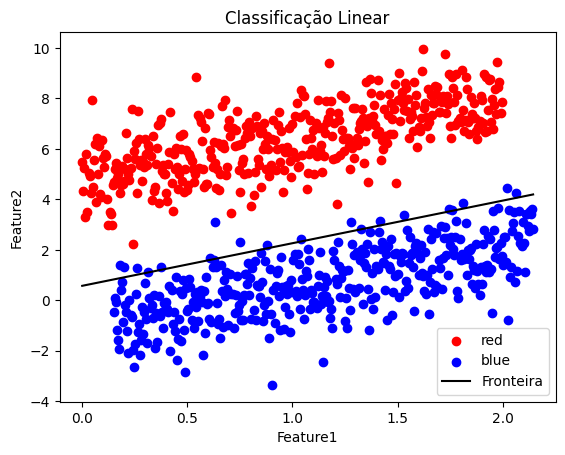

In [36]:
## Juntando os gráficos acima

plt.scatter(x[y[:,0]==0,0], x[y[:,0]==0,1], c="red", label="red")
plt.scatter(x[y[:,0]==1,0], x[y[:,0]==1,1], c="blue", label="blue")
x1_vals = np.linspace(x[:,0].min(), x[:,0].max(), 100) ## linspace cria 100 pontos entre o minimo e o maximo da x1
x2_vals = -(w[0] + w[1]*x1_vals) / w[2]
plt.plot(x1_vals, x2_vals, "k-", label="Fronteira")
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.legend()
plt.title("Classificação Linear")

plt.show()

### Gráficos utilizando o plotly

In [37]:
# criando um dataframe com "erros"
erros_df = pd.DataFrame({'erros': erros})

# adicionando uma coluna de epocas no erros_df
erros_df['epocas'] = erros_df.index

ev_erro = px.line(erros_df, x = "epocas", y = "erros", title = "Evolução do erro")
ev_erro.show()
